Let's assume that you have recorded the diameters and prices of pizzas that you have
previously eaten in your pizza journal. These observations comprise our training data:

Training instance | Diameter in inches | Price in dollars:

1 | 6 | 7

2 | 8 | 9

3 | 10 | 13

4 | 14 | 17.5

5 | 18 | 18

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X reprsents the features of our training data, the diameter of the pizzas.

y is the vector representing the prices of the pizzas.

In [3]:
X = np.array([[6], [8], [10], [14], [18]])
print(X)
X = np.array([[6], [8], [10], [14], [18]]).reshape(-1, 1)
print(X)
y = [7, 9, 13, 17.5, 18]

[[ 6]
 [ 8]
 [10]
 [14]
 [18]]
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]


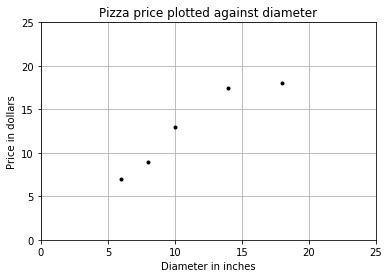

In [7]:
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

Implementing Linear Regression on the Data

In [12]:
# import the library corresponding to Linear Regression
from sklearn.linear_model import LinearRegression

# create the instance of the estimator
model = LinearRegression()

# fit the model on the training data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# Predict the pricing of a pizza for which the diameter has never been seen before
test_pizza = np.array([[12]])
predicted_price = model.predict(test_pizza)[0]
print('A 12" pizza should cost: $%.2f' %predicted_price)

A 12" pizza should cost: $13.68


Calculating RSS (Residual Sum of Squares) cost function value for our model:

In [15]:
print('Residual sum of squares: %.2f' % np.mean((model.predict(X) - y) ** 2))

Residual sum of squares: 1.75


Solving for OLS (Ordinary Least Square) for simple linear regression

In [16]:
# Calculating variance
import numpy as np

X = np.array([[6], [8], [10], [14], [18]]).reshape(-1, 1)
# calculating the x mean or x_bar value
x_bar = X.mean()
print(x_bar)

# Calculating variance
# Note that we substract one from the number of training instances when calculating the sample variance.
# This is called Bessel's correction. It corrects the bias in the estimation of the population variance from a sample.
variance = ((X - x_bar) ** 2).sum() / (X.shape[0] - 1)
print(variance)

11.2
23.2


In [17]:
# using Numpy to calculate variance with ddof set to 1 for Bessel's correction
print(np.var(X, ddof=1))

23.2


Covariance:

It is a measure of how much the two variables change together.
- If the variables increase together, their covariance is positive
- If one variable tends to increase while the other decreases, their covariance is negative

In [22]:
# Calculating covariance.
# For this we need to define y again

y = np.array([7, 9, 13, 17.5, 18])
y_bar = y.mean()
print(y_bar)

12.9


In [21]:
# We need to use a transpose of X in order for the matrix multiplication to work
covariance = (np.multiply((X - x_bar).transpose(), y - y_bar).sum()) / (X.shape[0] - 1)
print(covariance)

# alternatively, calculating using the built in covariance function
print(np.cov(X.transpose(), y)[0][1])

22.65
22.650000000000002


Solving for alpha and beta for the linear regression example:

y_bar = alpha + beta(x_bar)

and 

beta = cov(x,y) / var(x)

Implies:

beta = 22.65 / 23.2 ~= 0.98

Hence,

alpha = y_bar - beta(x_bar) = 12.9 - 0.98 * 11.2 ~= 1.97

# R-squared or Coefficient of determination

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [68]:
# X_train = np.array([[6], [8], [10], [14], [18]])
# print(X_train)
X_train = np.array([[6], [8], [10], [14], [18]]).reshape(-1, 1)
# print(X_train)
y_train = np.array([7, 9, 13, 17.5, 18])

# X_test = np.array([[8], [9], [11], [16], [12]])
# print(X_test)
X_test = np.array([[8], [9], [11], [16], [12]]).reshape(-1, 1)
# print(X_test)
y_test = np.array([11, 8.5, 15, 18, 11])

model = LinearRegression()
model.fit(X_train, y_train)

# The score method of LinearRegression returns the model's R-squared value
r_squared = model.score(X_test, y_test)
print(r_squared)

0.6620052929422553


# Classification with KNN

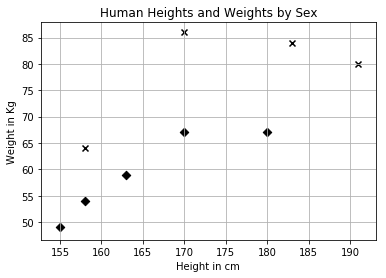

In [72]:
# Applying KNN to a binary classification problem. The response variable can take two values - male, female. 
# The data is height and weight records of individuals - the feature set

import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in Kg')

for i, x in enumerate(X_train):
    # use cross markers for instaces that are male and diamond markers for instances that are female.
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')
    
plt.grid(True)
plt.show()

Euclidean Distance between the training values and a sample test value [155, 70]

In [73]:
x = np.array([[155, 70]])
distances = np.sqrt(np.sum((X_train - x)**2, axis=1))
print(distances)

[ 6.70820393 21.9317122  31.30495168 37.36308338 21.         13.60147051
 25.17935662 16.2788206  15.29705854]


In [74]:
nearest_neighbor_indices = distances.argsort()[:3]
nearest_neighbor_genders = np.take(y_train, nearest_neighbor_indices)
print(nearest_neighbor_genders)

['male' 'female' 'female']


In [75]:
from collections import Counter
b = Counter(np.take(y_train, distances.argsort()[:3]))
b.most_common(1)[0][0]

'female'

KNN classifier implementation using scikit-learn

In [76]:
# LabelBinarizer converts strings to binary/integer
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

In [80]:
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
print(y_train_binarized)
# print(y_train_binarized.reshape(-1))

[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [35]:
k = 3
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train_binarized.reshape(-1))
prediction_binarized = clf.predict(np.array([155, 70]).reshape(1, -1))[0]
predicted_label = lb.inverse_transform(prediction_binarized)
print(predicted_label)

['female']


In [37]:
X_test = np.array([
    [168, 65],
    [180, 96],
    [160, 52],
    [169, 67]
])
y_test = ['male', 'male', 'female', 'female']
y_test_binarized = lb.transform(y_test)
print('Binarized labels: %s' %y_test_binarized.T[0])
predictions_binarized = clf.predict(X_test)
print('Binarized predictions: %s' %predictions_binarized)
print('Predicted labels: %s' %lb.inverse_transform(predictions_binarized))

Binarized labels: [1 1 0 0]
Binarized predictions: [0 1 0 0]
Predicted labels: ['female' 'male' 'female' 'female']


# Model Evaluation

- Accuracy

In [39]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_test_binarized, predictions_binarized))

Accuracy: 0.75


- Precision

In [40]:
from sklearn.metrics import precision_score
print('Precision: %s' % precision_score(y_test_binarized, predictions_binarized))

Precision: 1.0


- Recall

In [42]:
from sklearn.metrics import recall_score
print('Recall: %s' % recall_score(y_test_binarized, predictions_binarized))

Recall: 0.5


- F1 Score = F1 Score summarizes precision and recall with a single statistic.

In [44]:
from sklearn.metrics import f1_score
print('F1 Score: %s' % f1_score(y_test_binarized, predictions_binarized))

F1 Score: 0.6666666666666666


"The arithmatic mean of the precision and recall scores is the upper bound of the F1 score. The F1 score penalizes classifiers more as the difference between their precision and recall scores increases."

- Matthews Correlation Coefficient (MCC) - It is an alternative to the F1 score for measuring the performance of binary classifiers. A perfect classifier's MCC is 1.

In [45]:
from sklearn.metrics import matthews_corrcoef
print('Matthews correlation coefficient: %s' % matthews_corrcoef(y_test_binarized, predictions_binarized))

Matthews correlation coefficient: 0.5773502691896258


- classification_report - This is a convenience function provided by scikit-learn that reports precision, recall and F1 score:

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test_binarized, predictions_binarized, target_names=['male'], labels=[1]))

             precision    recall  f1-score   support

       male       1.00      0.50      0.67         2

avg / total       1.00      0.50      0.67         2



# Regression with KNN

In [8]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train = np.array([
    [158, 1],
    [170, 1],
    [183, 1],
    [191, 1],
    [155, 0],
    [163, 0],
    [180, 0],
    [158, 0],
    [170, 0]
])

y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

X_test = np.array([
    [168, 1],
    [180, 1],
    [160, 0],
    [169, 0]
])
y_test = [65, 96, 52, 67]

k = 3
clf = KNeighborsRegressor(n_neighbors=k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Predicted Weights: %s' %predictions)
print('Coefficient of determination: %s' %r2_score(y_test, predictions))
print('Mean absolute error: %s' %mean_absolute_error(y_test, predictions))
print('Mean squared error: %s' %mean_squared_error(y_test, predictions))
print('Root mean squared error: %s' %np.sqrt(mean_squared_error(y_test, predictions)))

Predicted Weights: [70.66666667 79.         59.         70.66666667]
Coefficient of determination: 0.6290565226735438
Mean absolute error: 8.333333333333336
Mean squared error: 95.8888888888889
Root mean squared error: 9.792287214378922


Scaling Features

In [61]:
from scipy.spatial.distance import euclidean

# heights in millimeters
X_train = np.array([
    [1700, 1],
    [1600, 0]
])
x_test = np.array([1640, 1]).reshape(1, -1)
# print(x_test)
print(euclidean(X_train[0,:], x_test))
print(euclidean(X_train[1,:], x_test))


# heights in meters
X_train = np.array([
    [1.7, 1],
    [1.6, 0]
])
x_test = np.array([164, 1]).reshape(1, -1)
# print(x_test)
print(euclidean(X_train[0, :], x_test))
print(euclidean(X_train[1, :], x_test))

60.0
40.01249804748511
162.3
162.40307878855006


- Standard Scaler:
It is a transformer that scales features so that they have unit variance

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = np.array([
    [158, 1],
    [170, 1],
    [183, 1],
    [191, 1],
    [155, 0],
    [163, 0],
    [180, 0],
    [158, 0],
    [170, 0]
])

y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

X_test = np.array([
    [168, 1],
    [180, 1],
    [160, 0],
    [169, 0]
])
y_test = [65, 96, 52, 67]

X_train_scaled = ss.fit_transform(X_train)

print(X_train)
print(X_train_scaled)

[[158   1]
 [170   1]
 [183   1]
 [191   1]
 [155   0]
 [163   0]
 [180   0]
 [158   0]
 [170   0]]
[[-0.9908706   1.11803399]
 [ 0.01869567  1.11803399]
 [ 1.11239246  1.11803399]
 [ 1.78543664  1.11803399]
 [-1.24326216 -0.89442719]
 [-0.57021798 -0.89442719]
 [ 0.86000089 -0.89442719]
 [-0.9908706  -0.89442719]
 [ 0.01869567 -0.89442719]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
X_test_scaled = ss.transform(X_test)

clf.fit(X_train_scaled, y_train)
predictions = clf.predict(X_test_scaled)
print('Predicted weigths: %s' %predictions)
print('Coefficient of determination: %s' %r2_score(y_test, predictions))
print('Mean absolute error: %s' %mean_absolute_error(y_test, predictions))
print('Mean squared error: %s' %mean_squared_error(y_test, predictions))
print('Root mean squared error: %s' %np.sqrt(mean_squared_error(y_test, predictions)))

Predicted weigths: [78.         83.33333333 54.         64.33333333]
Coefficient of determination: 0.6706425961745109
Mean absolute error: 7.583333333333336
Mean squared error: 85.13888888888893
Root mean squared error: 9.227073690444275


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Feature Extraction

<b>One-hot-encoding</b>

In [12]:
# scikit-learn's DictVectorizer class is a transformer that can be used to one-hot encode categorical features
from sklearn.feature_extraction import DictVectorizer
onehot_encoder = DictVectorizer()
X = [
    {'city': 'New York'},
    {'city': 'San Francisco'},
    {'city': 'Chapel Hill'}
]
# print(onehot_encoder.fit_transform(X))
print(onehot_encoder.fit_transform(X).toarray())

  (0, 1)	1.0
  (1, 2)	1.0
  (2, 0)	1.0
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [86]:
from sklearn import preprocessing
import numpy as np
X = np.array([
    [0., 0., 5., 13., 9., 1.],
    [0., 0., 13., 15., 10., 15.],
    [0., 3., 15., 2., 0., 11.]
])
print(preprocessing.scale(X))

[[ 0.         -0.70710678 -1.38873015  0.52489066  0.59299945 -1.35873244]
 [ 0.         -0.70710678  0.46291005  0.87481777  0.81537425  1.01904933]
 [ 0.          1.41421356  0.9258201  -1.39970842 -1.4083737   0.33968311]]


<b>Extracting features from text - Bag-of-words Model</b>

In [14]:
corpus = [
    'UNC played Duke in basketball',
    'Duke lost the basketball game'
]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
print(vectorizer.fit_transform(corpus))
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

  (0, 0)	1
  (0, 3)	1
  (0, 1)	1
  (0, 5)	1
  (0, 7)	1
  (1, 2)	1
  (1, 6)	1
  (1, 4)	1
  (1, 0)	1
  (1, 1)	1
[[1 1 0 1 0 1 0 1]
 [1 1 1 0 1 0 1 0]]
{'unc': 7, 'played': 5, 'duke': 1, 'in': 3, 'basketball': 0, 'lost': 4, 'the': 6, 'game': 2}


In [89]:
corpus.append('I ate a sandwitch')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[0 1 1 0 1 0 1 0 0 1]
 [0 1 1 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 1 0 0]]
{'unc': 9, 'played': 6, 'duke': 2, 'in': 4, 'basketball': 1, 'lost': 5, 'the': 8, 'game': 3, 'ate': 0, 'sandwitch': 7}


In [91]:
from sklearn.metrics.pairwise import euclidean_distances
X = vectorizer.fit_transform(corpus).todense()
print('Distance between 1st and 2nd documents:', euclidean_distances(X[0], X[1]))
print('Distance between 1st and 3rd documents:', euclidean_distances(X[0], X[2]))
print('Distance between 2nd and 3rd documents:', euclidean_distances(X[1], X[2]))

Distance between 1st and 2nd documents: [[2.44948974]]
Distance between 1st and 3rd documents: [[2.64575131]]
Distance between 2nd and 3rd documents: [[2.64575131]]


Stop word filtering - This is to filter out the words that are most common of the documents in the corpus. Eg: the, an, a, do, be, will, on, around etc

In [93]:
vectorizer = CountVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[0 1 1 0 0 1 0 1]
 [0 1 1 1 1 0 0 0]
 [1 0 0 0 0 0 1 0]]
{'unc': 7, 'played': 5, 'duke': 2, 'basketball': 1, 'lost': 4, 'game': 3, 'ate': 0, 'sandwitch': 6}


# Stemming and lemmatization

In [95]:
corpus = [
    'He ate the sandwitches',
    'Every sandwitch was eaten by him'
]
vectorizer = CountVectorizer(binary=True, stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[1 0 0 1]
 [0 1 1 0]]
{'ate': 0, 'sandwitches': 3, 'sandwitch': 2, 'eaten': 1}


In [101]:
corpus = [
    'I am gathering ingredients for the sandwitch.',
    'There were many wizards at the gathering.'
]
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anshul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [102]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('gathering', 'v'))
print(lemmatizer.lemmatize('gathering', 'n'))

gather
gathering


Comparing Lemmatization with Stemming

In [107]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print(stemmer.stem('gathering'))

gather


In [108]:
import nltk
# nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\anshul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [109]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag

wordnet_tags = ['n', 'v']
corpus = [
    'He ate the sandwitches',
    'Every sandwitch was eaten by him'
]
stemmer = PorterStemmer()
print('Stemmed: ', [[stemmer.stem(token) for token in word_tokenize(document)] for document in corpus])

def lemmatize(token, tag):
    if tag[0].lower() in ['n', 'v']:
        return lemmatizer.lemmatize(token, tag[0].lower())
    return token

lemmatizer = WordNetLemmatizer()
tagged_corpus = [pos_tag(word_tokenize(document)) for document in corpus]
print('Lemmatized: ', [[lemmatize(token, tag) for token, tag in document] for document in tagged_corpus])

Stemmed:  [['He', 'ate', 'the', 'sandwitch'], ['everi', 'sandwitch', 'wa', 'eaten', 'by', 'him']]
Lemmatized:  [['He', 'eat', 'the', 'sandwitches'], ['Every', 'sandwitch', 'be', 'eat', 'by', 'him']]


# Extending bag-of-words with tf-idf weights

In [17]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'The dog ate a sandwitch, the wizard transfigured a sandwitch, and I ate a sandwitch'
]
vectorizer = CountVectorizer(stop_words='english')
frequencies = np.array(vectorizer.fit_transform(corpus).todense())[0]
print(frequencies)
print('Token indices: ', vectorizer.vocabulary_)
for token, index in vectorizer.vocabulary_.items():
    print('The token "%s" appears %s times.' %(token, frequencies[index]))

[2 1 3 1 1]
Token indices:  {'dog': 1, 'ate': 0, 'sandwitch': 2, 'wizard': 4, 'transfigured': 3}
The token "dog" appears 1 times.
The token "ate" appears 2 times.
The token "sandwitch" appears 3 times.
The token "wizard" appears 1 times.
The token "transfigured" appears 1 times.


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus=[
    'The dog ate a sandwitch and I ate a sandwitch',
    'The wizard transfigured a sandwitch'
]
vectorizer = TfidfVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense())

[[0.75458397 0.37729199 0.53689271 0.         0.        ]
 [0.         0.         0.44943642 0.6316672  0.6316672 ]]
